In [18]:
!make

make: « exe » est à jour.


In [7]:
## A CHANGER EN FONCTION DE LA CONFIG QUE VOUS VOULEZ TESTER

In [19]:
!./replicationSimulation.sh 2 configVaccin configDpt01 configDpt13

mts000M000000 0 configVaccin configDpt01
mts000M000001 0 configVaccin configDpt13
mts000M000002 1 configVaccin configDpt01
mts000M000003 1 configVaccin configDpt13
mts000M000004 2 configVaccin configDpt01
mts000M000005 2 configVaccin configDpt13
Nom de la commande :./exe
Nom du fichier MT a utiliser :mts000M000000
Num�ro de la replication :0
config �pid�mie :configVaccin
config g�ographique :configDpt01
./mts-0000-0999/mts000M000000
Nom de la commande :./exe
Nom du fichier MT a utiliser :mts000M000001
Num�ro de la replication :0
config �pid�mie :configVaccin
config g�ographique :configDpt13
./mts-0000-0999/mts000M000001
Nom de la commande :./exe
Nom du fichier MT a utiliser :mts000M000002
Num�ro de la replication :1
config �pid�mie :configVaccin
config g�ographique :configDpt01
./mts-0000-0999/mts000M000002
Nom de la commande :./exe
Nom du fichier MT a utiliser :mts000M000003
Num�ro de la replication :1
config �pid�mie :configVaccin
config g�ographique :configDpt13
./mts-0000-0999/mts0

La ville a pour coord X : 57512 , coordY : 0, taille : 3741 , nbHab : 7923
La ville a pour coord X : 63836 , coordY : 0, taille : 6324 , nbHab : 6886
La ville a pour coord X : 69032 , coordY : 0, taille : 5196 , nbHab : 7161
La ville a pour coord X : 71481 , coordY : 0, taille : 2449 , nbHab : 6920
Le pourcentage de carte recouverte par des lieu est de : 0.000000 %
Le pourcentage de carte recouverte par des lieu est de : 0.000000 %
Le pourcentage de carte recouverte par des lieu est de : 0.000000 %
Le pourcentage de carte recouverte par des lieu est de : 0.000000 %
Le pourcentage de carte recouverte par des lieu est de : 0.000000 %
Le pourcentage de carte recouverte par des lieu est de : 0.000000 %
***************STATISTICS******************
Safe : 650148
Contamined : 0
Recovered : 1279
Dead : 15
***************STATISTICS******************
Safe : 650181
Contamined : 0
Recovered : 1245
Dead : 16

real	7m18,002s
user	6m53,180s
sys	0m24,754s

real	7m18,364s
user	6m53,013s
sys	0m25,311s
**

configDpt01
############################ Ville : configDpt01#####################
0000
log-configVaccin-configDpt01-MT-mts000M000000NumRepli0.txt
Le taux de mort de cas connu est de : 1.4162077104642015%
Le taux de mortalité du département sur l'ensemble de la population est de : 0.002758908208058464%
Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.0%
Le taux de mortalité pour les 25 - 35 ans est de : 0.7518796992481203%
Le taux de mortalité pour les 35 - 45 ans est de : 0.6060606060606061%
Le taux de mortalité pour les 45 - 55 ans est de : 0.5128205128205128%
Le taux de mortalité pour les 55 - 65 ans est de : 1.25%
Le taux de mortalité pour les 65 - 75 ans est de : 2.142857142857143%
Le taux de mortalité pour les 75 + ans est de : 8.928571428571429%
############
################
 replication = 0
0002
log-configVaccin-configDpt01-MT-mts000M000002NumRepli1.txt
Le taux de mort de cas connu est de : 1.26883425852498%
Le taux de m

/tmp/ipykernel_4067254/1582432872.py:363: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  listIntervalle95 = [st.t.interval(alpha=0.95, df=len(r)-1, loc=np.mean(r), scale=st.sem(r)) for r in zip(*listResReplicationTruncated)]
/home/local.isima.fr/beantunes/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2343: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/local.isima.fr/beantunes/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2344: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/tmp/ipykernel_4067254/1582432872.py:363: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  listIntervalle95 = [st.t.interval(alpha=0.95, df=len(r)-1, loc

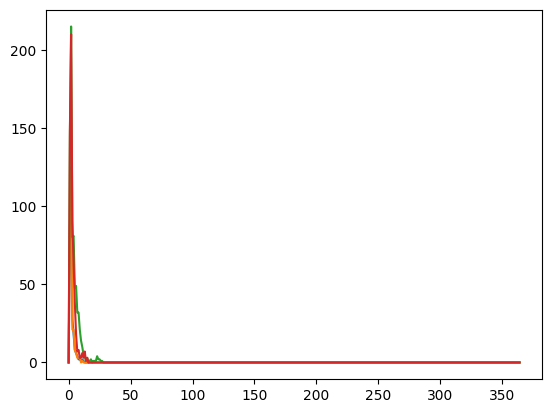

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import csv
from statistics import mean,variance
'''
Ce qu'on a comme résultats pour le moment :
- Les listes
- Taux de mortalité des gens contaminé
- Taux de mortalité par tranche d'age des gens contaminé
- Reffectif
- Taux d'incidence

On peut donc envisager beaucoup d'autres résultats.


'''

NB_REPLICATION = 2
NOM_EXPERIENCE = "configVaccin"
listDptConfig = [1,13]  

#listVille = ["configLyon"]
figureNouvCas = plt.figure()
axes = figureNouvCas.add_subplot()

pasFigure = 6 * NB_REPLICATION
compteurFigure = 0
for nbDpt in listDptConfig:
    ville = "configDpt" + f"{nbDpt:02}"
    print(ville)
    print("############################ Ville : " + ville + "#####################")
    compteurFigure = compteurFigure + pasFigure
    listResReplication = [[] for x in range(0,NB_REPLICATION)]


    for replication in listResReplication:

        listNumIteration = []
        listNbNouvCas = []
        listNbPersonneHosp = []
        listNbPersonneRea = []
        listNbNouvHosp = []
        listNbNouvRea = []
        listNbNouvMort = []
        nbCasCovidConnuTotal = 0
        listAgeMort = []
        listAgeNouvCasSymptomatique = []
        listReffectif = []
        listTauxIncidence = []
        
        temp = len(listDptConfig) * (listResReplication.index(replication)) + listDptConfig.index(nbDpt)
        stringFormat = f"{temp:04}"
        print(stringFormat)
        print("log-"+NOM_EXPERIENCE+"-"+str(ville)+ "-MT-mts000M00"+stringFormat+"NumRepli"+str(listResReplication.index(replication))+".txt")
        f = open("log-"+NOM_EXPERIENCE+"-"+str(ville)+ "-MT-mts000M00"+stringFormat+"NumRepli"+str(listResReplication.index(replication))+".txt", "r")
        fileLines = f.readlines()
        i = 0
        for line in fileLines:
            if("CompteurRand:" in line):
                listSplit = line.split(":")
                nbRandomGenere = (int(listSplit[1]))
            elif("NbHumainSimuDepart:" in line):
                listSplit = line.split(":")
                nbHumainSimuDepart = (int(listSplit[1]))
            elif("##" not in line):
                if(i == 0):
                    listNumIteration.append(int(line))
                    i = i + 1
                elif(i==1):
                    listNbNouvCas.append(int(line))
                    i = i + 1
                elif(i==2):
                    listNbPersonneHosp.append(int(line))
                    i = i + 1
                elif(i==3):
                    listNbPersonneRea.append(int(line))
                    i = i + 1
                elif(i==4):
                    listNbNouvHosp.append(int(line))
                    i = i + 1
                elif(i==5):
                    listNbNouvRea.append(int(line))
                    i = i + 1
                elif(i==6):
                    listNbNouvMort.append(int(line))
                    i = i + 1
                elif(i==7):
                    nbCasCovidConnuTotal = (int(line))
                    i = i + 1
                elif(i==8):
                    listReffectif.append(float(line))
                    i = i + 1
                elif(i==9):
                    listTauxIncidence.append(float(line))
                    i = i + 1
                elif("AgeC:" in line):
                    listSplit = line.split(":")
                    listAgeNouvCasSymptomatique.append(int(listSplit[1]))
                elif("AgeD:" in line):
                    listSplit = line.split(":")
                    listAgeMort.append(int(listSplit[1]))

            else:
                i = 0

        f.close()


        #label=str(ville)+ "-MT-"+stringFormat+"config"+NOM_EXPERIENCE+"NumRepli"+str(listResReplication.index(replication)+1) 
        axes.plot(listNumIteration, listNbNouvCas, label="test")
        """
        plt.figure((listResReplication.index(replication)*6)+compteurFigure)
        print("Courbe des nouveaux cas sur la réplication num : " +str(listResReplication.index(replication)))
        plt.plot(listNumIteration, listNbNouvCas)  # Matplotlib plot.
        plt.xlabel("Jour")
        plt.ylabel("Nouv Cas")
        plt.title(label="Courbe nouvCas"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication)))
        plt.savefig("nouvCas"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".png")
        string = "nouvCas"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".csv"
        with open(string, "w") as fCsv:
            write = csv.writer(fCsv)
            write.writerow(listNbNouvCas)

        plt.figure((listResReplication.index(replication)*6+1)+compteurFigure)
        print("Courbe des nouvelles hospitalisation sur la réplication num : " +str(listResReplication.index(replication)))
        plt.plot(listNumIteration, listNbNouvHosp)
        plt.xlabel("Jour")
        plt.ylabel("Nouv Hosp")
        plt.title(label="Courbe nouvHosp"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication)))
        plt.savefig("nouvHosp"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".png")
        with open("nouvHosp"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
            write = csv.writer(fCsv)
            write.writerow(listNbNouvHosp)

        plt.figure((listResReplication.index(replication)*6+2)+compteurFigure)
        print("Courbe des nouvelles réanimation sur la réplication num : " +str(listResReplication.index(replication)))
        plt.plot(listNumIteration, listNbNouvRea)
        plt.xlabel("Jour")
        plt.ylabel("Nouv Rea")
        plt.title(label="Courbe nouvRea"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication)))
        plt.savefig("nouvRea"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".png")
        with open("nouvRea"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
            write = csv.writer(fCsv)
            write.writerow(listNbNouvRea)

        plt.figure((listResReplication.index(replication)*6+3)+compteurFigure)
        print("Courbe des nouveaux morts sur la réplication num : " +str(listResReplication.index(replication)))
        plt.plot(listNumIteration, listNbNouvMort)
        plt.xlabel("Jour")
        plt.ylabel("Nouv Mort")
        plt.title(label="Courbe nouvMort"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication)))
        plt.savefig("nouvMort"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".png")
        with open("nouvMort"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
            write = csv.writer(fCsv)
            write.writerow(listNbNouvMort)

        print("Courbe de Reffectif sur la réplication num : " +str(listResReplication.index(replication)))
        plt.figure((listResReplication.index(replication)*6+4)+compteurFigure)
        plt.plot(listNumIteration, listReffectif)
        plt.xlabel("Jour")
        plt.ylabel("Reffectif")
        plt.title(label="Courbe Reffectif"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication)))
        plt.savefig("Reffectif"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".png")
        with open("Reffectif"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
            write = csv.writer(fCsv)
            write.writerow(listReffectif)
            
        print("Courbe du taux d'incidence sur la réplication num : " +str(listResReplication.index(replication)))
        plt.figure((listResReplication.index(replication)*6+5)+compteurFigure)
        plt.plot(listNumIteration, listTauxIncidence)
        plt.xlabel("Jour")
        plt.ylabel("Taux Incidence")
        plt.title(label="Courbe Taux incidence"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication)))
        plt.savefig("TauxIncidence"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".png")
        with open("TauxIncidence"+str(ville) + str(NOM_EXPERIENCE)+"_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
            write = csv.writer(fCsv)
            write.writerow(listTauxIncidence)
        """
        nbMortTotal = sum(listNbNouvMort)
        try:
            tauxDeMortCasConnu = (nbMortTotal / nbCasCovidConnuTotal) * 100
        except:
            tauxDeMortCasConnu = 0
        tauxMortalitePopulationGobale = (nbMortTotal / nbHumainSimuDepart) * 100

        print("Le taux de mort de cas connu est de : " + str(tauxDeMortCasConnu) + "%")
        print("Le taux de mortalité du département sur l'ensemble de la population est de : " + str(tauxMortalitePopulationGobale) + "%")

        ## IL ME FAUT L'AGE DES GENS CONTAMINE AUSSI ... 


        nbAge0 = 0
        nbAge1 = 0
        nbAge2 = 0
        nbAge3 = 0
        nbAge4 = 0
        nbAge5 = 0
        nbAge6 = 0
        nbAge7 = 0

        for i in listAgeNouvCasSymptomatique:
            if i == 0:
                nbAge0 = nbAge0 + 1
            elif i == 1:
                nbAge1 = nbAge1 + 1
            elif i == 2:
                nbAge2 = nbAge2 + 1
            elif i == 3:
                nbAge3 = nbAge3 + 1
            elif i == 4:
                nbAge4 = nbAge4 + 1
            elif i == 5:
                nbAge5 = nbAge5 + 1
            elif i == 6:
                nbAge6 = nbAge6 + 1
            elif i == 7:
                nbAge7 = nbAge7 + 1


        nbAgeMort0 = 0
        nbAgeMort1 = 0
        nbAgeMort2 = 0
        nbAgeMort3 = 0
        nbAgeMort4 = 0
        nbAgeMort5 = 0
        nbAgeMort6 = 0
        nbAgeMort7 = 0

        for i in listAgeMort:
            if i == 0:
                nbAgeMort0 = nbAgeMort0 + 1
            elif i == 1:
                nbAgeMort1 = nbAgeMort1 + 1
            elif i == 2:
                nbAgeMort2 = nbAgeMort2 + 1
            elif i == 3:
                nbAgeMort3 = nbAgeMort3 + 1
            elif i == 4:
                nbAgeMort4 = nbAgeMort4 + 1
            elif i == 5:
                nbAgeMort5 = nbAgeMort5 + 1
            elif i == 6:
                nbAgeMort6 = nbAgeMort6 + 1
            elif i == 7:
                nbAgeMort7 = nbAgeMort7 + 1

        try :
            print("Le taux de mortalité pour les 0 - 15 ans est de : " + str( (nbAgeMort0/nbAge0) * 100) + "%")
        except ZeroDivisionError:
            print ("Aucun age 0 n'a été malade")
        try :
            print("Le taux de mortalité pour les 15 - 25 ans est de : " + str( (nbAgeMort1/nbAge1) * 100) + "%") 
        except ZeroDivisionError:
            print ("Aucun age 1 n'a été malade")
        try :
            print("Le taux de mortalité pour les 25 - 35 ans est de : " + str( (nbAgeMort2/nbAge2) * 100) + "%")
        except ZeroDivisionError:
            print ("Aucun age 2 n'a été malade")
        try:
            print("Le taux de mortalité pour les 35 - 45 ans est de : " + str( (nbAgeMort3/nbAge3) * 100) + "%")
        except ZeroDivisionError:
            print ("Aucun age 3 n'a été malade")
        try :
            print("Le taux de mortalité pour les 45 - 55 ans est de : " + str( (nbAgeMort4/nbAge4) * 100) + "%")
        except ZeroDivisionError:
            print ("Aucun age 4 n'a été malade")
        try:
            print("Le taux de mortalité pour les 55 - 65 ans est de : " + str( (nbAgeMort5/nbAge5) * 100) + "%")
        except ZeroDivisionError:
            print ("Aucun age 5 n'a été malade")
        try:
            print("Le taux de mortalité pour les 65 - 75 ans est de : " + str( (nbAgeMort6/nbAge6) * 100) + "%")
        except ZeroDivisionError:
            print ("Aucun age 6 n'a été malade")
        try:
            print("Le taux de mortalité pour les 75 + ans est de : " + str( (nbAgeMort7/nbAge7) * 100) + "%")
        except ZeroDivisionError:
            print ("Aucune age 7 n'a été malade")

        print("############\n################")
        print(" replication = " + str(listResReplication.index(replication)))
        replication.append(listNumIteration)
        replication.append(listNbNouvCas)
        replication.append(listNbPersonneHosp)
        replication.append(listNbPersonneRea)
        replication.append(listNbNouvHosp)
        replication.append(listNbNouvMort)
        replication.append(listReffectif)
        replication.append(nbCasCovidConnuTotal)
        replication.append(tauxDeMortCasConnu)
        replication.append(tauxMortalitePopulationGobale)
        try :
            replication.append((nbAgeMort0/nbAge0) * 100)
        except ZeroDivisionError:
            replication.append(0)
        try :
            replication.append((nbAgeMort1/nbAge1) * 100)
        except ZeroDivisionError:
            replication.append(0)
        try :
            replication.append((nbAgeMort2/nbAge2) * 100)
        except ZeroDivisionError:
            replication.append(0)
        try :
            replication.append((nbAgeMort3/nbAge3) * 100)
        except ZeroDivisionError:
            replication.append(0)
        try :
            replication.append((nbAgeMort4/nbAge4) * 100)
        except ZeroDivisionError:
            replication.append(0)
        try :
            replication.append((nbAgeMort5/nbAge5) * 100)
        except ZeroDivisionError:
            replication.append(0)
        try :
            replication.append((nbAgeMort6/nbAge6) * 100)
        except ZeroDivisionError:
            replication.append(0)
        try :
            replication.append((nbAgeMort7/nbAge7) * 100)
        except ZeroDivisionError:
            replication.append(0)
            
        replication.append(int(nbRandomGenere))



    dataframeResultats = pd.DataFrame({"Champs":["nbCasCovidConnuTotal","tauxDeMortCasConnu","tauxMortalitePopulationGobale", "tauxDeMort0-15ans", "tauxDeMort15-25ans","tauxDeMort25-35ans","tauxDeMort35-45ans","tauxDeMort45-55ans","tauxDeMort55-65ans","tauxDeMort65-75ans","tauxDeMort75+ans","nbRandomGenere"]})
    numRepli = 1
    listResReplicationTruncated = []
    for replication in listResReplication:
        nomRepli = "R"+str(numRepli)
        dataframeResultats[nomRepli] = replication[-12:]
        listResReplicationTruncated.append(replication[-12:])
        numRepli = numRepli + 1

    
    if(NB_REPLICATION > 1):
        listMoyenne = [mean(list(map(float,list(r)))) for r in zip(*listResReplicationTruncated)]

        listVariance = [variance(list(map(float,list(r)))) for r in zip(*listResReplicationTruncated)]

        '''
        Confidence Intervals Using the t Distribution
        If we’re working with a small sample (n <30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean.

        The following example shows how to calculate a confidence interval for the true population mean height (in inches) of a certain species of plant, using a sample of 15 plants:



        ###########
        Confidence Intervals Using the Normal Distribution
        If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.




        '''

        listIntervalle95 = [st.t.interval(alpha=0.95, df=len(r)-1, loc=np.mean(r), scale=st.sem(r)) for r in zip(*listResReplicationTruncated)]

        dataframeResultats["Moyenne"] = listMoyenne
        dataframeResultats["Variance"] = listVariance
        dataframeResultats["Intervalle95%"] = listIntervalle95

    print(dataframeResultats)

    dataframeResultats.to_csv("stats"+str(ville) + str(NOM_EXPERIENCE)+".csv", sep="|")
    dataframeResultats.to_html("stats"+str(ville) + str(NOM_EXPERIENCE)+".html",float_format='%.3f')

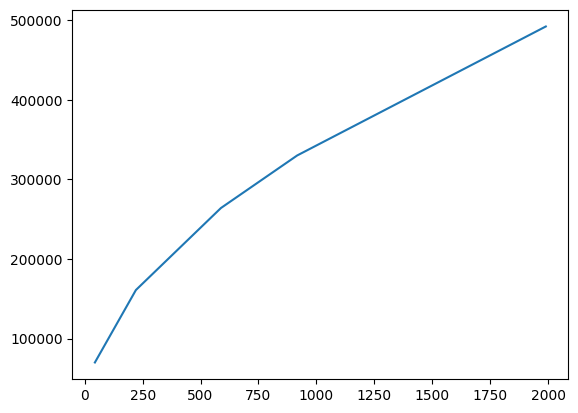

In [2]:
import matplotlib.pyplot as plt
plt.plot([44,221,588,917,1990],[70000,161000,264000,330000,492000])

[ 43885.06248518 116924.96278337 200008.1067469  286518.35933351
 359558.2596317  402283.86236256 475323.76266075 529151.65618184
 578677.96052628 621403.56325713]


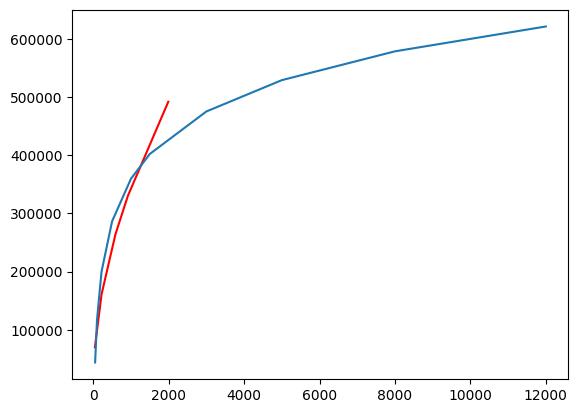

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([44,221,588,917,1990]).reshape(-1,1)
y = np.array([70000,161000,264000,330000,492000])

model = LinearRegression()
model.fit(np.log(x),y)

x_pred = np.array([50,100,220,500,1000,1500,3000,5000,8000,12000]).reshape(-1,1)
y_pred = model.predict(np.log(x_pred))
print(y_pred)

plt.plot([44,221,588,917,1990],[70000,161000,264000,330000,492000],color='r')
plt.plot([50,100,220,500,1000,1500,3000,5000,8000,12000],y_pred)